<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2021-08-04 02:17:01.574941


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

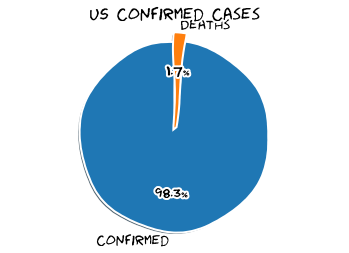

US Population
330362592
US Confirmed
35224145 (10.66226802095075% of population)
US Deaths
613501

New York City Confirmed
981829 (11.777024732580792% of population)
New York City Deaths
33543

Philippines Confirmed
1612541
Philippines Deaths
28141



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

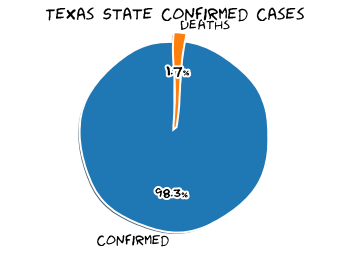

Texas State Total Population
28701845
Texas State Confirmed
3170787 (11.047328142145565% of population)
Texas State Deaths
53390 (1.6838090984982592% of confirmed)



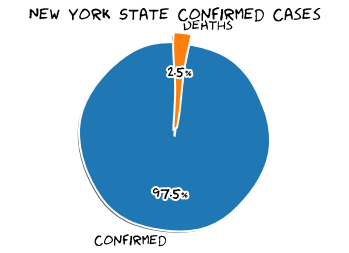

New York State Total Population
19542209
New York State Confirmed
2158388 (11.044749342308231% of population)
New York State Deaths
53416 (2.4748099044286755% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1628036490000,40.636182,-73.949356,289281,None,10524,278757,Kings,36047,"Kings, New York, US",11300.467244,None,None,84036047,USA
11,New York,US,1628036490000,40.710881,-73.816847,283655,None,10025,273630,Queens,36081,"Queens, New York, US",12585.309279,None,None,84036081,USA
16,New York,US,1628036490000,40.883201,-72.801217,205096,None,3414,201682,Suffolk,36103,"Suffolk, New York, US",13889.737309,None,None,84036103,USA
17,New York,US,1628036490000,40.740665,-73.589419,188050,None,3186,184864,Nassau,36059,"Nassau, New York, US",13858.550663,None,None,84036059,USA
18,New York,US,1628036490000,40.852093,-73.862828,187440,None,6599,180841,Bronx,36005,"Bronx, New York, US",13216.688396,None,None,84036005,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,New York,US,1628036490000,44.116308,-73.772978,1636,None,26,1610,Essex,36031,"Essex, New York, US",4435.407347,None,None,84036031,USA
2379,New York,US,1628036490000,42.635055,-77.103699,1183,None,26,1157,Yates,36123,"Yates, New York, US",4748.524867,None,None,84036123,USA
2454,New York,US,1628036490000,42.391840,-76.877330,1090,None,14,1076,Schuyler,36097,"Schuyler, New York, US",6121.188297,None,None,84036097,USA
3037,New York,US,1628036490000,43.661466,-74.497220,318,None,2,316,Hamilton,36041,"Hamilton, New York, US",7201.086957,None,None,84036041,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1628036490000,40.636182,-73.949356,289281,None,10524,278757,Kings,36047,"Kings, New York, US",11300.467244,None,None,84036047,USA
11,New York,US,1628036490000,40.710881,-73.816847,283655,None,10025,273630,Queens,36081,"Queens, New York, US",12585.309279,None,None,84036081,USA
18,New York,US,1628036490000,40.852093,-73.862828,187440,None,6599,180841,Bronx,36005,"Bronx, New York, US",13216.688396,None,None,84036005,USA
25,New York,US,1628036490000,40.767273,-73.971526,143830,None,4539,139291,New York,36061,"New York, New York, US",8830.936952,None,None,84036061,USA
87,New York,US,1628036490000,40.585822,-74.148086,77623,None,1856,75767,Richmond,36085,"Richmond, New York, US",16302.455355,None,None,84036085,USA


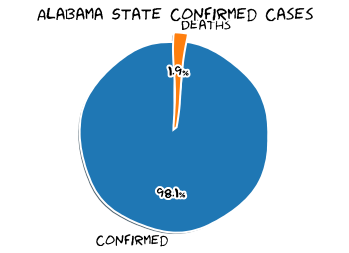

Alabama State Total Population
4887871
Alabama State Confirmed
592417 (12.120143923601912% of population)
Alabama State Deaths
11542 (1.9482898026221396% of confirmed)



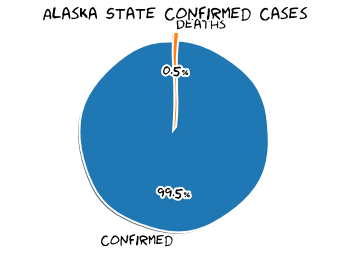

Alaska State Total Population
737438
Alaska State Confirmed
76532 (10.378092802377962% of population)
Alaska State Deaths
391 (0.5108974023937699% of confirmed)



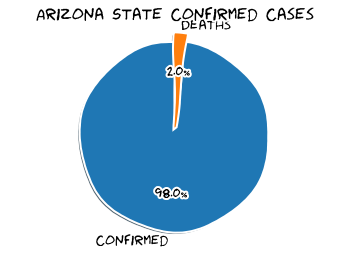

Arizona State Total Population
7171646
Arizona State Confirmed
933361 (13.014599437841746% of population)
Arizona State Deaths
18282 (1.9587276520017443% of confirmed)



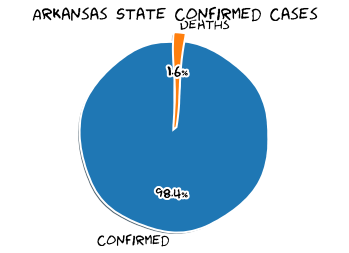

Arkansas State Total Population
3013825
Arkansas State Confirmed
391623 (12.994218310618566% of population)
Arkansas State Deaths
6215 (1.5869854426323275% of confirmed)



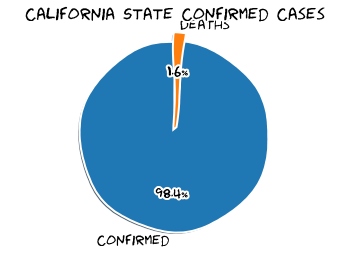

California State Total Population
39557045
California State Confirmed
3986544 (10.077962092466715% of population)
California State Deaths
64559 (1.6194227380909378% of confirmed)



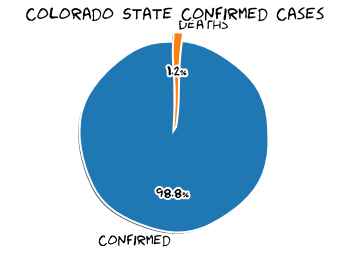

Colorado State Total Population
5695564
Colorado State Confirmed
578278 (10.153129698832284% of population)
Colorado State Deaths
6959 (1.203400440618526% of confirmed)



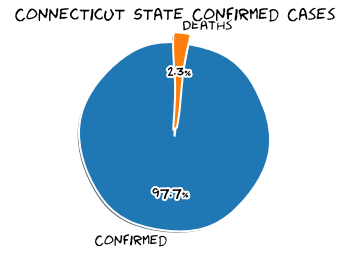

Connecticut State Total Population
3572665
Connecticut State Confirmed
356164 (9.969140683495374% of population)
Connecticut State Deaths
8292 (2.328140968767197% of confirmed)



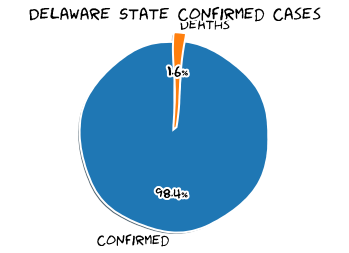

Delaware State Total Population
967171
Delaware State Confirmed
111762 (11.555557393677022% of population)
Delaware State Deaths
1833 (1.640092339077683% of confirmed)



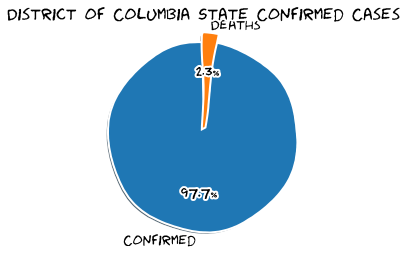

District of Columbia State Total Population
702455
District of Columbia State Confirmed
50800 (7.231779971670783% of population)
District of Columbia State Deaths
1149 (2.2618110236220472% of confirmed)



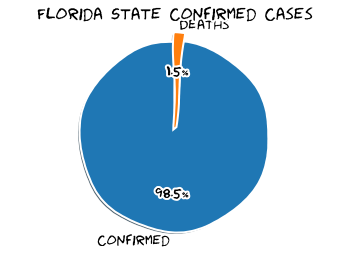

Florida State Total Population
21299325
Florida State Confirmed
2634234 (12.367687708413294% of population)
Florida State Deaths
39079 (1.4835052618711928% of confirmed)



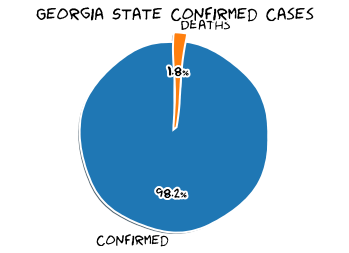

Georgia State Total Population
10519475
Georgia State Confirmed
1194768 (11.357677070386117% of population)
Georgia State Deaths
21723 (1.818177252822305% of confirmed)



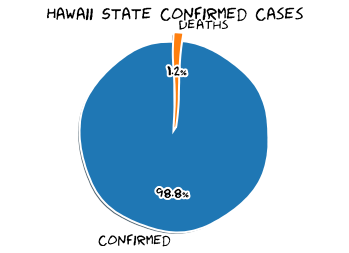

Hawaii State Total Population
1420491
Hawaii State Confirmed
43616 (3.0704875990062592% of population)
Hawaii State Deaths
538 (1.233492296404989% of confirmed)



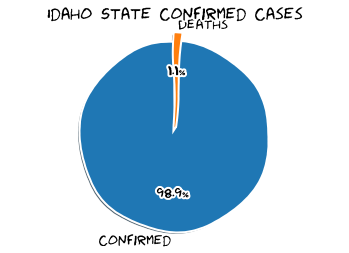

Idaho State Total Population
1754208
Idaho State Confirmed
202032 (11.516992283697258% of population)
Idaho State Deaths
2209 (1.0933911459570762% of confirmed)



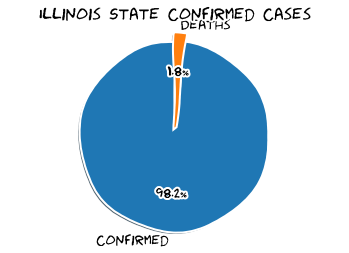

Illinois State Total Population
12741080
Illinois State Confirmed
1427901 (11.207064079340213% of population)
Illinois State Deaths
25891 (1.8132209445892957% of confirmed)



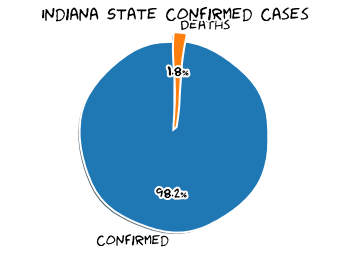

Indiana State Total Population
6691878
Indiana State Confirmed
775686 (11.591454596153726% of population)
Indiana State Deaths
13596 (1.75277109552061% of confirmed)



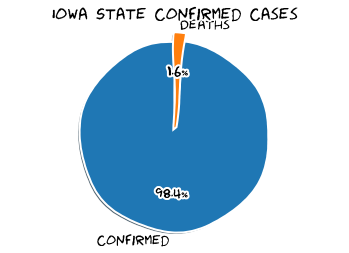

Iowa State Total Population
3156145
Iowa State Confirmed
378831 (12.002965643213477% of population)
Iowa State Deaths
6183 (1.6321261987535338% of confirmed)



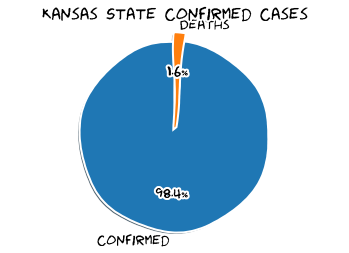

Kansas State Total Population
2911510
Kansas State Confirmed
333926 (11.46916891922061% of population)
Kansas State Deaths
5261 (1.5754987631990323% of confirmed)



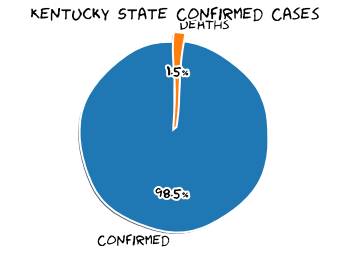

Kentucky State Total Population
4468402
Kentucky State Confirmed
487871 (10.91824325564262% of population)
Kentucky State Deaths
7352 (1.506955732150507% of confirmed)



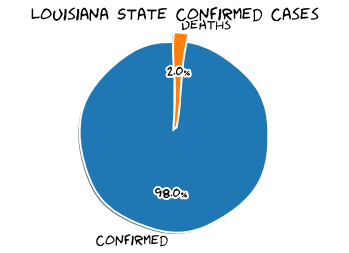

Louisiana State Total Population
4659978
Louisiana State Confirmed
557540 (11.96443416685658% of population)
Louisiana State Deaths
11085 (1.9881981561861033% of confirmed)



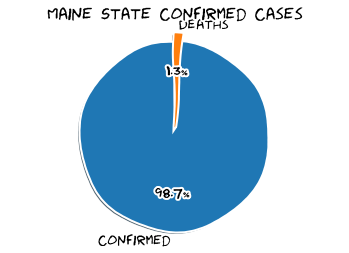

Maine State Total Population
1338404
Maine State Confirmed
70718 (5.283755876402043% of population)
Maine State Deaths
900 (1.2726604259170227% of confirmed)



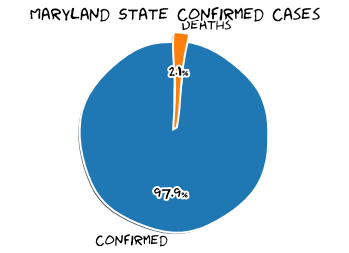

Maryland State Total Population
6042718
Maryland State Confirmed
469910 (7.776467477052545% of population)
Maryland State Deaths
9810 (2.0876338022174457% of confirmed)



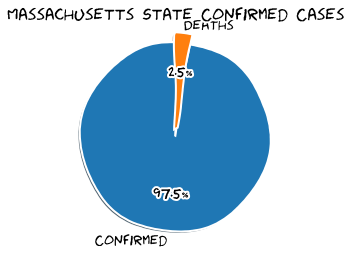

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
722986 (10.47479560351421% of population)
Massachusetts State Deaths
18086 (2.501569878254904% of confirmed)



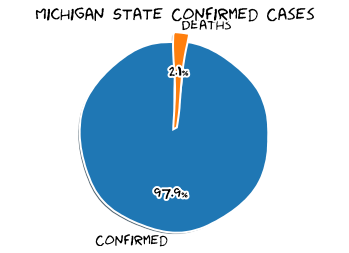

Michigan State Total Population
9995915
Michigan State Confirmed
1014087 (10.145014238316353% of population)
Michigan State Deaths
21216 (2.092128190184866% of confirmed)



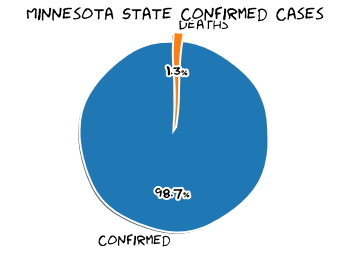

Minnesota State Total Population
5611179
Minnesota State Confirmed
614990 (10.96008521560264% of population)
Minnesota State Deaths
7771 (1.2635977820777573% of confirmed)



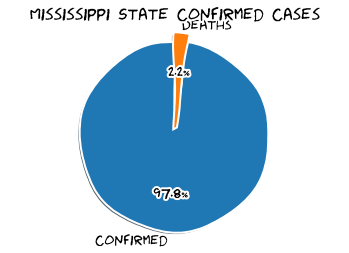

Mississippi State Total Population
2986530
Mississippi State Confirmed
350070 (11.721630119235368% of population)
Mississippi State Deaths
7590 (2.1681378010112264% of confirmed)



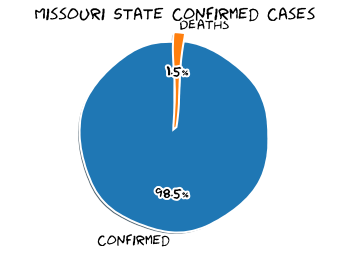

Missouri State Total Population
6126452
Missouri State Confirmed
692340 (11.300831215196006% of population)
Missouri State Deaths
10193 (1.4722535170580928% of confirmed)



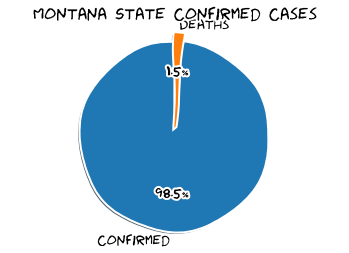

Montana State Total Population
1062305
Montana State Confirmed
117033 (11.016892512037503% of population)
Montana State Deaths
1716 (1.466253108097716% of confirmed)



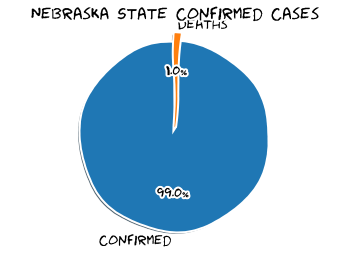

Nebraska State Total Population
1929268
Nebraska State Confirmed
229443 (11.89274895970907% of population)
Nebraska State Deaths
2281 (0.9941466943859695% of confirmed)



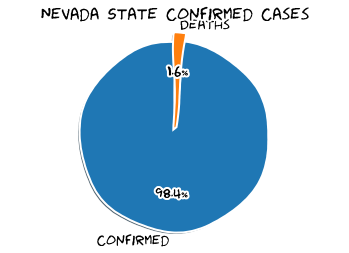

Nevada State Total Population
3034392
Nevada State Confirmed
360147 (11.868835667903157% of population)
Nevada State Deaths
5929 (1.6462722166226569% of confirmed)



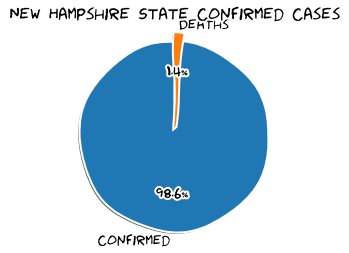

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
101155 (7.457289499564307% of population)
New Hampshire State Deaths
1388 (1.3721516484602836% of confirmed)



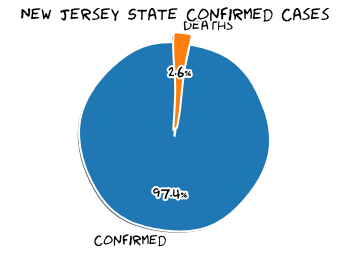

New Jersey State Total Population
8908520
New Jersey State Confirmed
1042472 (11.701966207630448% of population)
New Jersey State Deaths
26614 (2.552970247642143% of confirmed)



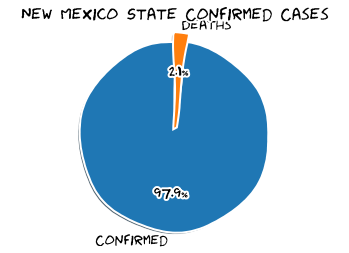

New Mexico State Total Population
2095428
New Mexico State Confirmed
211970 (10.11583313766925% of population)
New Mexico State Deaths
4415 (2.0828419115912626% of confirmed)



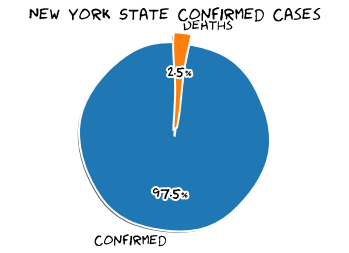

New York State Total Population
19542209
New York State Confirmed
2158388 (11.044749342308231% of population)
New York State Deaths
53416 (2.4748099044286755% of confirmed)



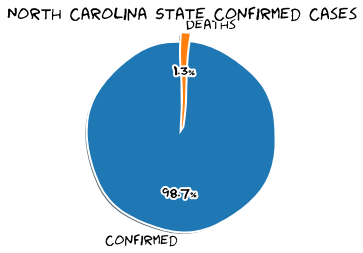

North Carolina State Total Population
10383620
North Carolina State Confirmed
1058887 (10.197667094905245% of population)
North Carolina State Deaths
13679 (1.2918281176367261% of confirmed)



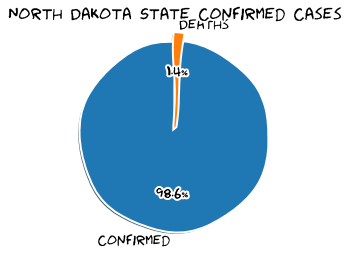

North Dakota State Total Population
760077
North Dakota State Confirmed
111837 (14.713903986043519% of population)
North Dakota State Deaths
1540 (1.377004032654667% of confirmed)



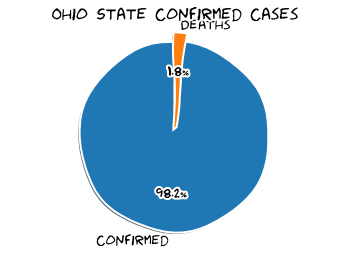

Ohio State Total Population
11689442
Ohio State Confirmed
1132798 (9.690779080814977% of population)
Ohio State Deaths
20526 (1.811973538088874% of confirmed)



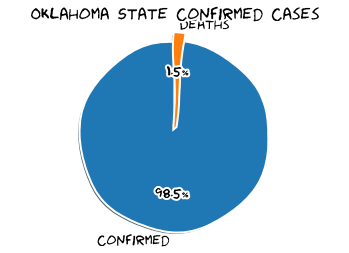

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
487178 (12.355268560432089% of population)
Oklahoma State Deaths
7485 (1.5363994269035137% of confirmed)



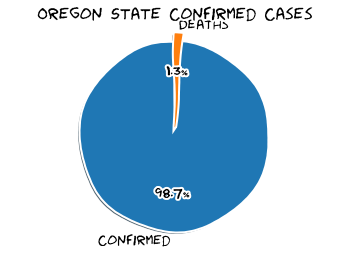

Oregon State Total Population
4190713
Oregon State Confirmed
223364 (5.329976068511492% of population)
Oregon State Deaths
2872 (1.285793592521624% of confirmed)



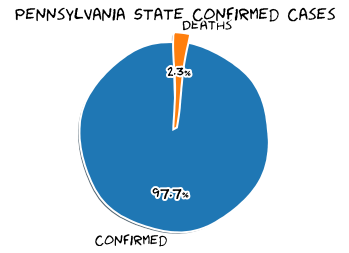

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
1233461 (9.63110190785395% of population)
Pennsylvania State Deaths
27868 (2.259333695998495% of confirmed)



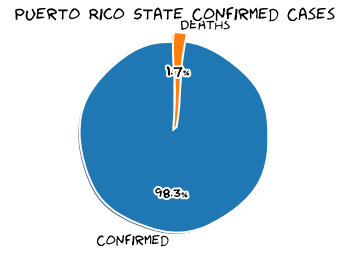

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
147820 (4.626382523778987% of population)
Puerto Rico State Deaths
2585 (1.748748477878501% of confirmed)



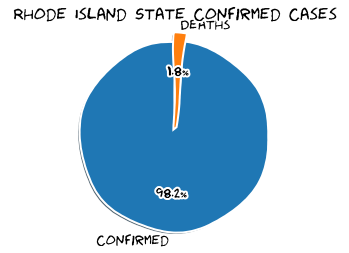

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
154985 (14.65835630819576% of population)
Rhode Island State Deaths
2740 (1.7679130238410168% of confirmed)



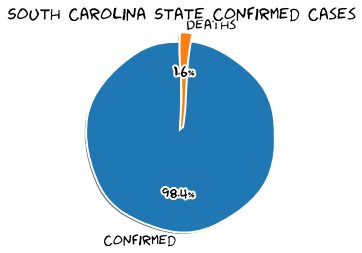

South Carolina State Total Population
5084127
South Carolina State Confirmed
626038 (12.313579106108088% of population)
South Carolina State Deaths
9917 (1.5840891447484018% of confirmed)



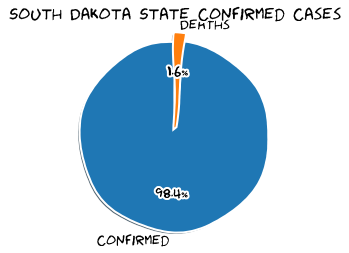

South Dakota State Total Population
882235
South Dakota State Confirmed
125225 (14.194063939879964% of population)
South Dakota State Deaths
2045 (1.6330604911159914% of confirmed)



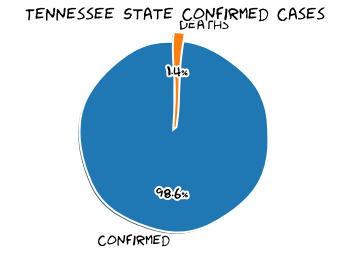

Tennessee State Total Population
6770010
Tennessee State Confirmed
903095 (13.339640561830779% of population)
Tennessee State Deaths
12766 (1.4135832885798283% of confirmed)



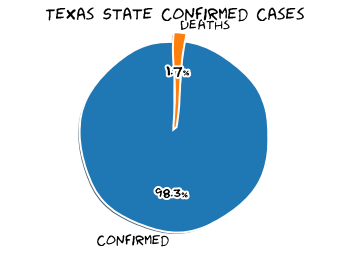

Texas State Total Population
28701845
Texas State Confirmed
3170787 (11.047328142145565% of population)
Texas State Deaths
53390 (1.6838090984982592% of confirmed)



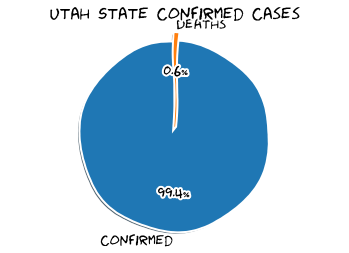

Utah State Total Population
3161105
Utah State Confirmed
435439 (13.77489833460135% of population)
Utah State Deaths
2471 (0.5674732855807587% of confirmed)



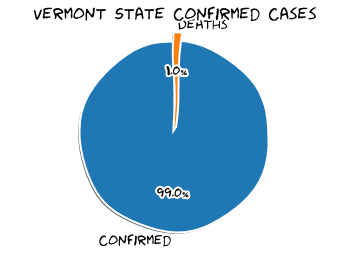

Vermont State Total Population
626299
Vermont State Confirmed
25077 (4.003998090368977% of population)
Vermont State Deaths
260 (1.0368066355624677% of confirmed)



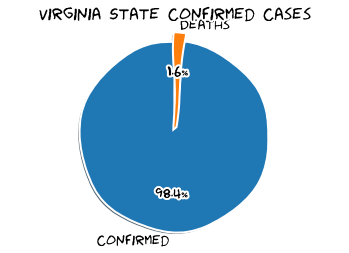

Virginia State Total Population
8517685
Virginia State Confirmed
699342 (8.210470333194994% of population)
Virginia State Deaths
11536 (1.6495505775428903% of confirmed)



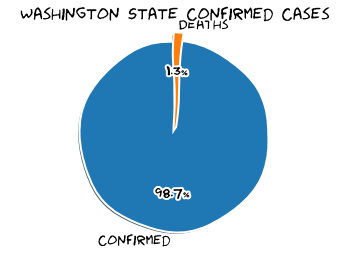

Washington State Total Population
7535591
Washington State Confirmed
481357 (6.387780334681114% of population)
Washington State Deaths
6136 (1.2747295666210319% of confirmed)



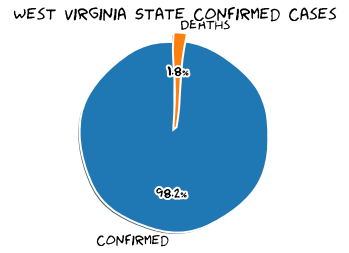

West Virginia State Total Population
1805832
West Virginia State Confirmed
167681 (9.28552600684892% of population)
West Virginia State Deaths
2949 (1.7586965726587986% of confirmed)



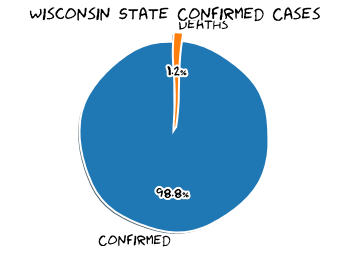

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
690856 (11.883511124321586% of population)
Wisconsin State Deaths
8299 (1.201263360237155% of confirmed)



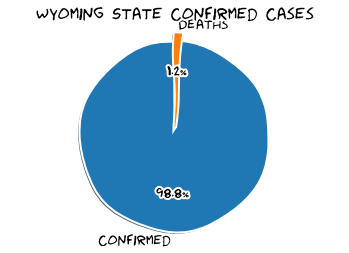

Wyoming State Total Population
577737
Wyoming State Confirmed
65704 (11.372648800405722% of population)
Wyoming State Deaths
786 (1.1962741994399122% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [ ]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 64097151},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1486681},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-12-02T17:26:32.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 41249718},
 'source': 'https://github.com/mathdroid/covid19'}

In [ ]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [ ]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-12-02 05:27:41,33.93911,67.709953,46717,1797,36907,8013,Afghanistan,120.00768283446756,3.846565490078558
1,,,,Albania,2020-12-02 05:27:41,41.1533,20.1683,39014,822,19384,18808,Albania,1355.6883730627562,2.1069359717024656
2,,,,Algeria,2020-12-02 05:27:41,28.0339,1.6596,84152,2447,54405,27300,Algeria,191.90421536837792,2.9078334442437495
3,,,,Andorra,2020-12-02 05:27:41,42.5063,1.5218,6790,76,5940,774,Andorra,8787.937617291143,1.1192930780559647
4,,,,Angola,2020-12-02 05:27:41,-11.2027,17.8739,15251,350,7932,6969,Angola,46.40319977917785,2.294931479902957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,,,,West Bank and Gaza,2020-12-02 05:27:41,31.9522,35.2332,88004,747,65938,21319,West Bank and Gaza,1725.089661380291,0.8488250534066634
3972,,,,Western Sahara,2020-12-02 05:27:41,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3973,,,,Yemen,2020-12-02 05:27:41,15.552727,48.516388,2197,619,1514,64,Yemen,7.36606436377857,28.17478379608557
3974,,,,Zambia,2020-12-02 05:27:41,-13.133897,27.849332,17665,357,17059,249,Zambia,96.08922040500968,2.020945372204925


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1628036490000,34.308284,-118.228241,1306079,None,24705,1281374,Los Angeles,06037,"Los Angeles, California, US",13009.912137,None,None,84006037,USA
1,Arizona,US,1628036490000,33.348359,-112.491815,586764,None,10480,576284,Maricopa,04013,"Maricopa, Arizona, US",13081.601832,None,None,84004013,USA
2,Illinois,US,1628036490000,41.841448,-87.816588,566466,None,10576,555890,Cook,17031,"Cook, Illinois, US",10998.842188,None,None,84017031,USA
3,Florida,US,1628036490000,25.611236,-80.551706,549405,None,6472,542933,Miami-Dade,12086,"Miami-Dade, Florida, US",20221.462380,None,None,84012086,USA
4,Texas,US,1628036490000,29.858649,-95.393395,427349,None,6729,420620,Harris,48201,"Harris, Texas, US",9066.826497,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Kentucky,US,1628036490000,NaN,NaN,9,None,0,9,Unassigned,90021,"Unassigned, Kentucky, US",NaN,None,None,84090021,USA
3239,Iowa,US,1628036490000,NaN,NaN,8,None,0,8,Unassigned,90019,"Unassigned, Iowa, US",NaN,None,None,84090019,USA
3240,Illinois,US,1628036490000,NaN,NaN,3,None,0,3,Out of IL,80017,"Out of IL, Illinois, US",NaN,None,None,84080017,USA
3241,Maine,US,1628036490000,NaN,NaN,3,None,0,3,Unassigned,90023,"Unassigned, Maine, US",NaN,None,None,84090023,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1628036490000,40.636182,-73.949356,289281,None,10524,278757,Kings,36047,"Kings, New York, US",11300.467244,None,None,84036047,USA
11,New York,US,1628036490000,40.710881,-73.816847,283655,None,10025,273630,Queens,36081,"Queens, New York, US",12585.309279,None,None,84036081,USA
16,New York,US,1628036490000,40.883201,-72.801217,205096,None,3414,201682,Suffolk,36103,"Suffolk, New York, US",13889.737309,None,None,84036103,USA
17,New York,US,1628036490000,40.740665,-73.589419,188050,None,3186,184864,Nassau,36059,"Nassau, New York, US",13858.550663,None,None,84036059,USA
18,New York,US,1628036490000,40.852093,-73.862828,187440,None,6599,180841,Bronx,36005,"Bronx, New York, US",13216.688396,None,None,84036005,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,New York,US,1628036490000,44.116308,-73.772978,1636,None,26,1610,Essex,36031,"Essex, New York, US",4435.407347,None,None,84036031,USA
2379,New York,US,1628036490000,42.635055,-77.103699,1183,None,26,1157,Yates,36123,"Yates, New York, US",4748.524867,None,None,84036123,USA
2454,New York,US,1628036490000,42.391840,-76.877330,1090,None,14,1076,Schuyler,36097,"Schuyler, New York, US",6121.188297,None,None,84036097,USA
3037,New York,US,1628036490000,43.661466,-74.497220,318,None,2,316,Hamilton,36041,"Hamilton, New York, US",7201.086957,None,None,84036041,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

2158388

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [ ]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
22,None,Philippines,1606929992000,12.879721,121.774017,434357,399005,8436,26916.0,None,None,Philippines,396.379539,None,None,608,PHL,PH


In [20]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
